Import Packages

In [1]:


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import seaborn as sns
import pingouin as pg
import itertools
from itertools import combinations
from statannotations.Annotator import Annotator
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report

# import openpyxl
# from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test


# TODO: add README file: 
# pip install pingouin
# pip install statannotations
# pip install fooof

In [2]:
import py_perceive

from py_perceive.PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import py_perceive.PerceiveImport.methods.load_rawfile as load_rawfile
import py_perceive.PerceiveImport.methods.find_folders as find_folders
import py_perceive.PerceiveImport.methods.metadata_helpers as metaHelpers


importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)

<module 'py_perceive.PerceiveImport.methods.metadata_helpers' from 'C:\\Users\\jebe12\\Research\\PyPerceive_Project\\Code\\PyPerceive\\src\\py_perceive\\PerceiveImport\\methods\\metadata_helpers.py'>

In [3]:
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'Longterm_beta_project','Code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm'

In [4]:

# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel
import src.bssu.bipolar.cluster_perm as cluster_perm


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(cluster_perm)

<module 'src.bssu.bipolar.cluster_perm' from 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\Code\\BetaSenSightLongterm\\src\\bssu\\bipolar\\cluster_perm.py'>

## 0. Compute Fourier Transform to frequency domain


	### WARNING: NaNs in Metadata Table sub-045 ###
NaNs in: sub-20220516PStn_ses-2022080806444798_run-BrainSense20220808070000.mat
NaNs in: sub-20220516PStn_ses-2022080806444798_run-BrainSense20220808071400.mat
NaNs in: sub-20220516PStn_ses-2022080806444798_run-BrainSense20220808072800.mat
NaNs in: sub-20220516PStn_ses-2022080806444798_run-BrainSense20220808073900.mat
NaNs in: sub-20220516PStn_ses-2022080806444798_run-BrainSense20220808075000.mat
NaNs in: sub-20220516PStn_ses-2023052407060188_run-BrainSense20230524072000.mat
NaNs in: sub-20220516PStn_ses-2023052407060188_run-IS20230524073700.mat
NaNs in: sub-20220516PStn_ses-2023052312341488_run-BrainSense20230523010000.mat
NaNs in: sub-20220516PStn_ses-2023052312341488_run-IS20230523012100.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5250
    Range : 0 ... 5249 =      0.000 ...    20.996 secs
R

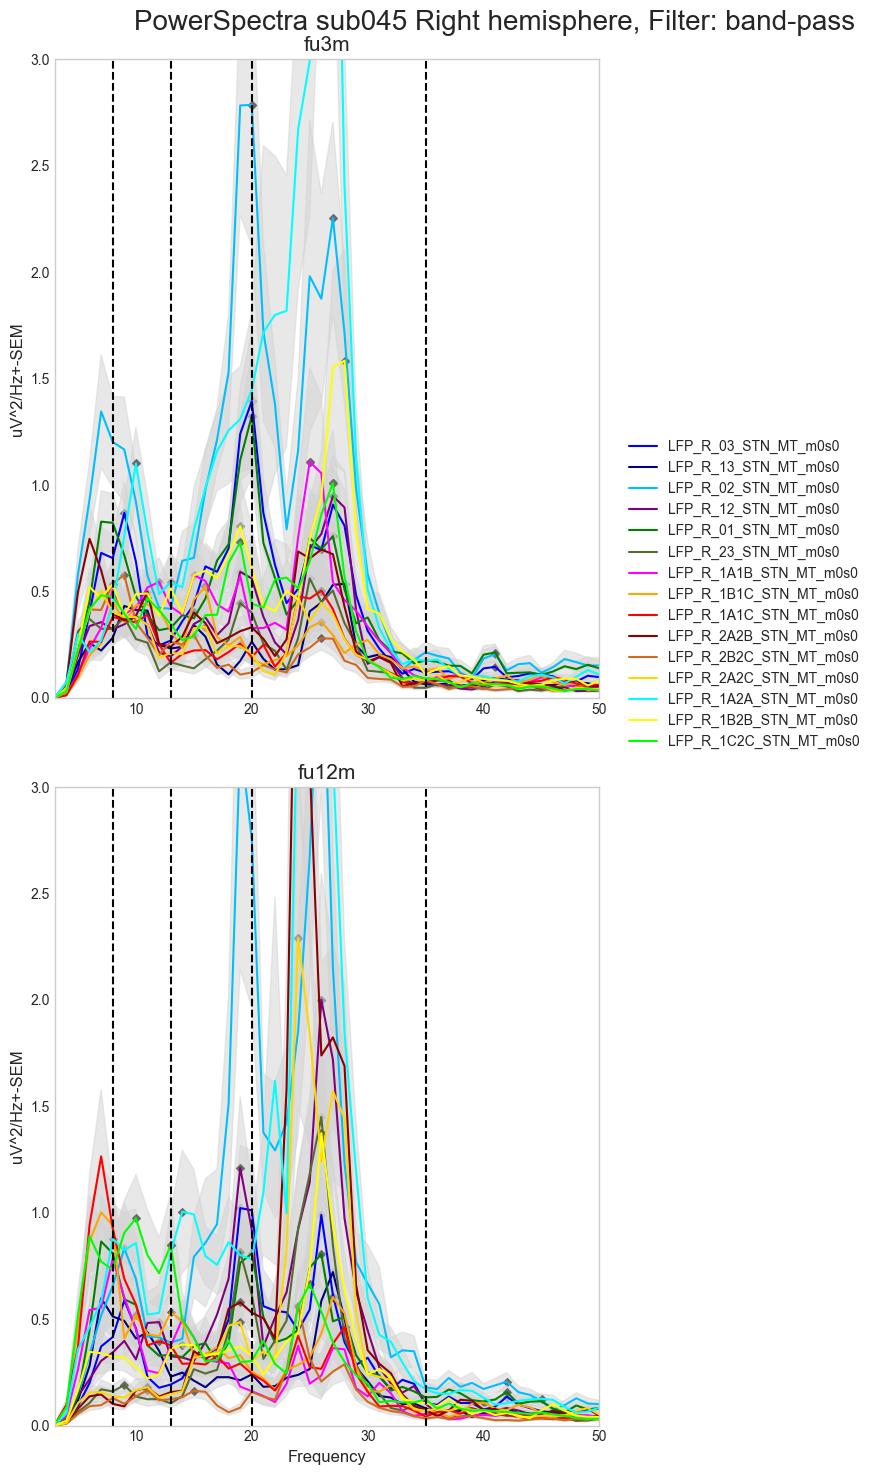

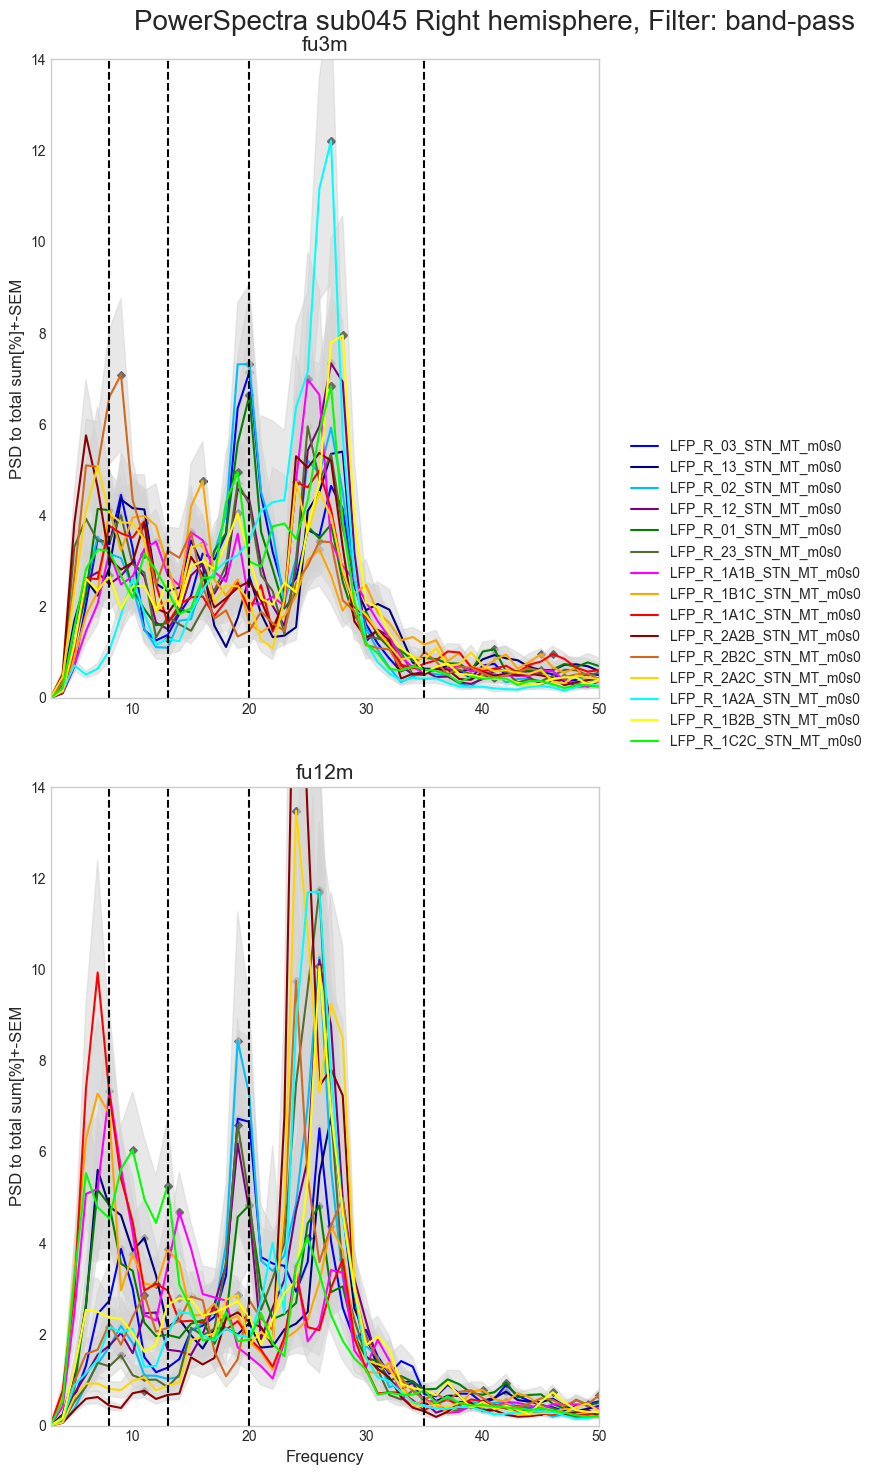

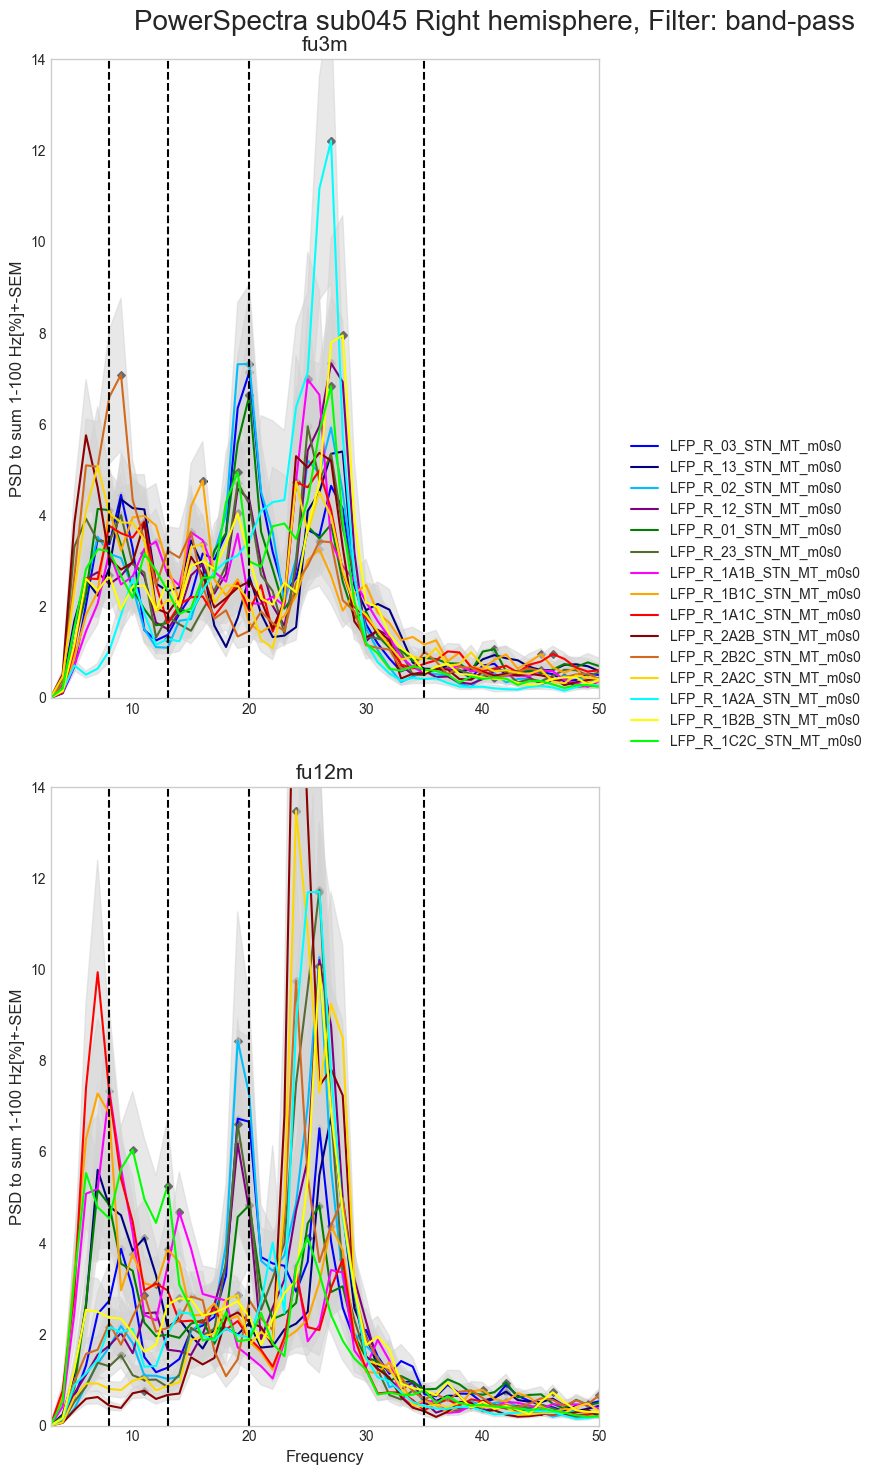

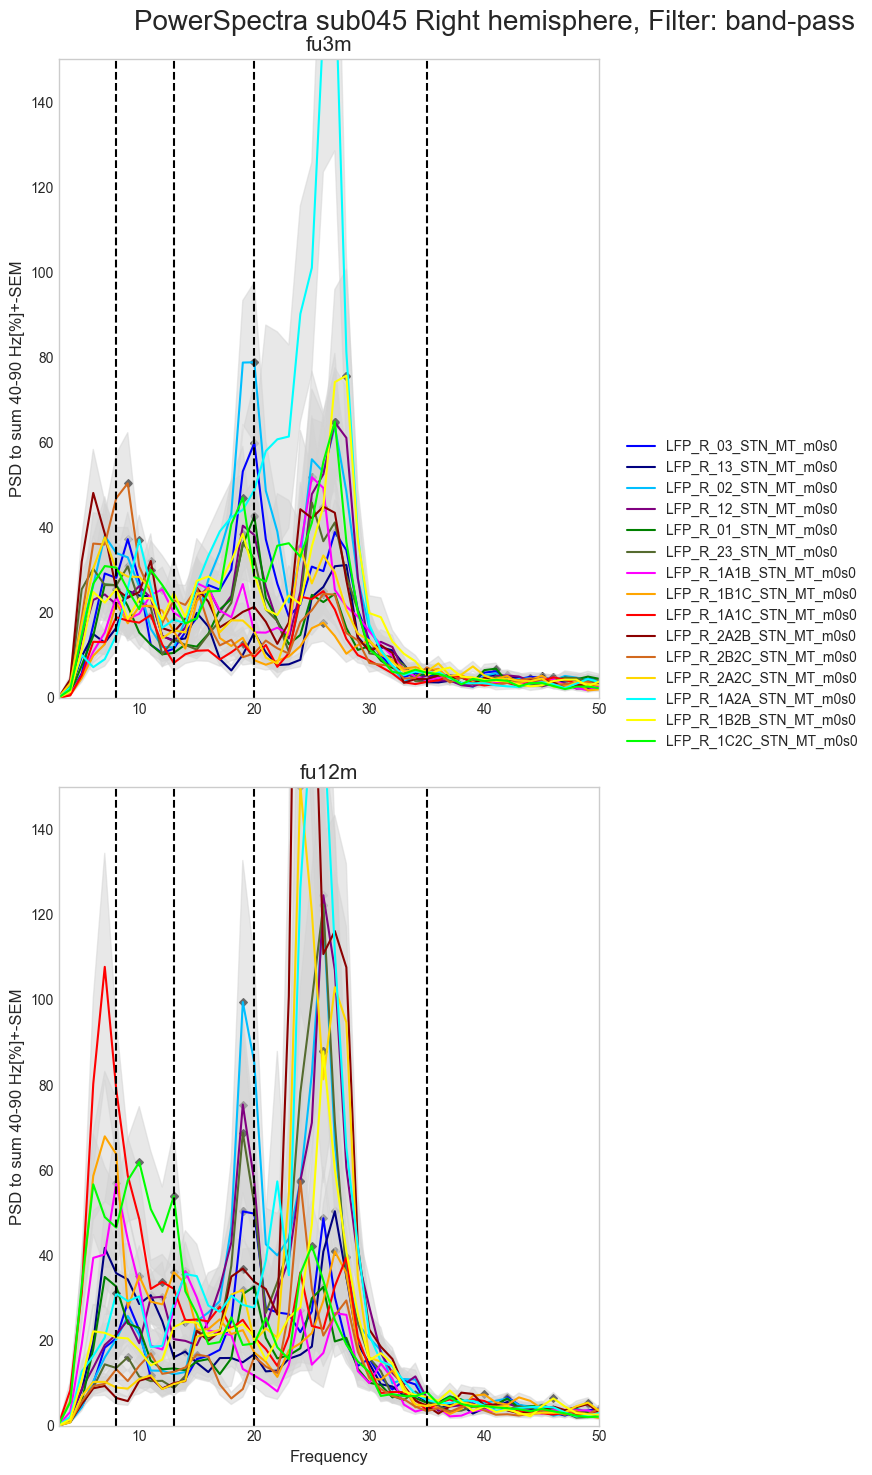

In [17]:
FF_psd = FFpsd.spectrogram_Psd(
    incl_sub = "045", 
    incl_session = ["fu3m", "fu12m"],
    incl_condition = ["m0s0"],
    pickChannels=['03', '13', '02', '12', '01', '23',
                  '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C',
                  '1A2A', '1B2B', '1C2C'],
    hemisphere="Right",
    filter="band-pass")

# TODO: for each new patient run both: band-pass and unfiltered 
# always run both: Left and Right hemisphere
# for now, only choose m0s0 as condition


In [13]:
# load with pyPerceive

# TODO: Problem with channel names of sub040 12MFU

mainclass_sub = main_class.PerceiveData(
        sub = "040", 
        incl_modalities= ["survey"],
        incl_session = ["fu3m", "fu12m"],
        incl_condition = ["m0s0"],
        incl_task = ["rest"],
        incl_contact=["RingR", "SegmIntraR", "SegmInterR"]
        )



	### WARNING: NaNs in Metadata Table sub-040 ###
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624071600.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624073100.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624074600.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624080100.mat
NaNs in: sub-20220329PStn_ses-2022062406574197_run-BrainSense20220624081700.mat
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channels=3, n_times=5188
    Range : 0 ... 5187 =      0.000 ...    20.748 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=5288
    Range : 0 ... 5287 =      0.000 ...    21.148 secs
Ready.
Creating RawArray with float64 data, n_channel

In [17]:
mainclass_sub.survey.fu12m.m0s0.rest.SegmInterR.run1.data.info.ch_names

['LFP_Stn_R_1_A1_A', 'LFP_Stn_R_1_B1_B', 'LFP_Stn_R_1_C1_C']

## 1. Load with classes

In [28]:
mainClass_data = mainAnalysis_class.MainClass(
    sub = "017",
    hemisphere = "Right",
    filter = "band-pass",
    result = "PSDaverageFrequencyBands",
    incl_session = ["postop", "fu3m", "fu12m"],
    pickChannels = ['03', '13', '02', '12', '01', '23', 
                    '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                    '1A2A', '1B2B', '1C2C'],
    normalization = ["rawPsd"],
    freqBands = ["beta"],
    feature= ["averagedPSD"]
)

In [30]:
mainClass_data.fu3m.BIP_01.Result_DF

,session,bipolarChannel,frequencyBand,absoluteOrRelativePSD,averagedPSD
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_alpha,fu3m,LFP_R_01_STN_MT,alpha,rawPsd,0.441523
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_lowBeta,fu3m,LFP_R_01_STN_MT,lowBeta,rawPsd,0.149506
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_highBeta,fu3m,LFP_R_01_STN_MT,highBeta,rawPsd,0.122228
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_beta,fu3m,LFP_R_01_STN_MT,beta,rawPsd,0.131716
fu3m_LFP_R_01_STN_MT_psdAverage_rawPsd_narrowGamma,fu3m,LFP_R_01_STN_MT,narrowGamma,rawPsd,0.027093
fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_alpha,fu3m,LFP_R_01_STN_MT,alpha,normPsdToTotalSum,4.481271
fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_lowBeta,fu3m,LFP_R_01_STN_MT,lowBeta,normPsdToTotalSum,1.517421
fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_highBeta,fu3m,LFP_R_01_STN_MT,highBeta,normPsdToTotalSum,1.240568
fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_beta,fu3m,LFP_R_01_STN_MT,beta,normPsdToTotalSum,1.336865
fu3m_LFP_R_01_STN_MT_psdAverage_normPsdToTotalSum_narrowGamma,fu3m,LFP_R_01_STN_MT,narrowGamma,normPsdToTotalSum,0.274983


In [ ]:
incl_sub = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "041", "045", "060"]
hemispheres = ["Right", "Left"]

psdAverage_dataframe = pd.DataFrame()

for sub in incl_sub:

    for hem in hemispheres:

        # load data from classes
        mainClass_data = mainAnalysis_class.MainClass(
            sub=sub,
            hemisphere=hem,
            filter="band-pass",
            result="PSDaverageFrequencyBands",
            incl_session=["fu3m"],
            pickChannels=['03', '13', '02', '12', '01', '23', 
                            '1A1B', '1B1C', '1A1C', '2A2B', '2B2C', '2A2C', 
                            '1A2A', '1B2B', '1C2C'],
            normalization=["rawPsd"],
            freqBands=["beta", "lowBeta", "highBeta"],
            feature=["averagedPSD"]
        )

        # get the fu3m Dataframe
        fu3m_DF = mainClass_data.fu3m.Result_DF
        fu3m_DF_copy = fu3m_DF.copy()

        # add columnn subject_hemisphere
        fu3m_DF_copy["subject_hemisphere"] = f"{sub}_{hem}"

        # add column recording_montage
        for index, row in fu3m_DF_copy.iterrows():
            bipolarChannel = row["bipolarChannel"].split("_")
            recording_montage = bipolarChannel[2] # just take 03, 02, etc from bipolarChannel column

            fu3m_DF_copy.loc[index, "recording_montage"] = recording_montage
        
        # only get rows with rawPsd and beta 
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.absoluteOrRelativePSD == "rawPsd"]
        fu3m_DF_copy = fu3m_DF_copy[fu3m_DF_copy.frequencyBand == "beta"]

        # rename column averagedPSD to beta_psd
        fu3m_DF_copy = fu3m_DF_copy.rename(columns={"averagedPSD": "beta_psd"})
        
        # drop columns bipolarChannel, 
        fu3m_DF_copy = fu3m_DF_copy.drop(columns=["bipolarChannel", "frequencyBand", "absoluteOrRelativePSD"])

        # concatenate all dataframes together
        psdAverage_dataframe = pd.concat([psdAverage_dataframe, fu3m_DF_copy], ignore_index=True)
                



# write Dataframe to Excel
# store each Dataframe in seperate sheets of an Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSight_fu3m_beta_psd.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    psdAverage_dataframe.to_excel(writer, sheet_name="beta_psd")


## 2. Write Dataframes

In [39]:
write_DF_function = writeGroupDF.write_BIPChannelGroups_ALLpsd(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038", "041", "060"], 
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="lowBeta"
)

In [36]:
write_DF_function["psdAverage_dataframe"].head()

,session,absoluteOrRelativePSD,highBeta_psd,subject_hemisphere,recording_montage,recording_montage_group,recording_montage_specificGroup,condition
0,fu3m,normPsdToSum40_90Hz,14.791108,017_Right,03,circular,circular_ring_ring,NaN
1,fu3m,normPsdToSum40_90Hz,15.316289,017_Right,13,circular,circular_ring_segm_long,NaN
2,fu3m,normPsdToSum40_90Hz,29.281802,017_Right,02,circular,circular_ring_segm_long,NaN
3,fu3m,normPsdToSum40_90Hz,20.030445,017_Right,12,circular,circular_segm_segm,NaN
4,fu3m,normPsdToSum40_90Hz,8.922624,017_Right,01,circular,circular_ring_segm_short,NaN


write Dataframe for all subject hemispheres with ranks and relative PSD to rank 1

In [41]:
loaded_DF = writeGroupDF.write_BIPChannelGroups_psdRanks_relToRank1(
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="highBeta"
)

pickle file loaded:  BIPChannelGroups_ALL_highBeta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results
file:  BIPChannelGroups_psdRanks_relToRank1_highBeta_rawPsd_band-pass.pickle 
written in:  c:\Users\jebe12\Research\Longterm_beta_project\results


In [32]:
loaded_DF["psdRank_and_relative_dataframe"].head()

,session,absoluteOrRelativePSD,beta_psd,subject_hemisphere,recording_montage,recording_montage_group,recording_montage_specificGroup,condition,rank,relativePSD_to_beta_Rank1
0,fu3m,rawPsd,0.298595,017_Right,12,circular,circular_segm_segm,NaN,2.0,0.998455
1,fu3m,rawPsd,0.131716,017_Right,01,circular,circular_ring_segm_short,NaN,3.0,0.440439
2,fu3m,rawPsd,0.299057,017_Right,23,circular,circular_ring_segm_short,NaN,1.0,1.000000
3,fu12m,rawPsd,0.189567,017_Right,12,circular,circular_segm_segm,NaN,3.0,0.240420
4,fu12m,rawPsd,0.242426,017_Right,01,circular,circular_ring_segm_short,NaN,2.0,0.307458


In [ ]:
loaded_DF = loadResults.load_BIPChannelGroups_ALL(
    freqBand="beta",
    normalization="rawPsd",
    signalFilter="band-pass"
)

In [ ]:
loaded_DF.head()

In [ ]:
loadedDF = loadResults.load_BIPChannelGroups_psdRanks_relToRank1(
    freqBand="beta",
    normalization="rawPsd",
    signalFilter="band-pass"
)

## 3. Load MNI coordinates

import scipy.io as sio

In [ ]:
mni_coord = load_mni.load_mni_coordinates(
    incl_sub=["017", "021", "024", "025", "026", "029", "030", "031", "032", "033", "035", "037", "038", "040"]
)

In [ ]:
dataframe = mni_coord["reco_native_concat"]

In [ ]:
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', "SenSightElectrode_coordinates.xlsx")

Excel = dataframe.to_excel(excel_path, sheet_name="reco_native")

In [ ]:
mni_file = sio.loadmat(filename)
reco_native = mni_file["reco"][0][0][1]
reco_scrf = mni_file["reco"][0][0][2]
reco_mni = mni_file["reco"][0][0][3]

reco_native_left = reco_native[0][0][0][0][1]
reco_native_right = reco_native[0][0][0][0][0]
reco_native_right

In [ ]:
reco_native_right_DF = pd.DataFrame(reco_native_right, columns=["reco_native_x", "reco_native_y", "reco_native_z"])
reco_native_right_DF.insert(0, "subject_hemisphere", "017_right")
reco_native_right_DF

In [ ]:
reco_scrf = mni_file["reco"][0][0][2]
reco_scrf_right = reco_scrf[0][0][0][0][0]
reco_scrf_left = reco_scrf[0][0][0][0][1]
reco_scrf_right

In [ ]:
reco_mni = mni_file["reco"][0][0][3]
reco_mni_right = reco_mni[0][0][0][0][0]
reco_mni_left =  reco_mni[0][0][0][0][1]

In [ ]:
# coordinates=scrf and =mni, doesn´t work if sub019 or sub034 are included because coordinates don´t exists!!

mni_mean_coord = load_mni.calculate_mean_coordinates_bipolarRecordings(
    incl_sub=["017", "021", "024", "025", "026", "029", "030", "031", "032", "033", "037", "038", "040"],
    coordinates="mni"
)

In [ ]:
mni_mean_coord["merged_Dataframe"]

Calculate MEAN xyz native coordinates of each recording montage per subject_hemisphere

In [ ]:
subject_list = ["017", "019", "021", "024", "025", "026", "029", "030", "031", "032", "033", "034", "035", "037", "038", "040"]
hemispheres = ["Right", "Left"]

current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

reco_native_concat = pd.DataFrame()

for sub in subject_list:
    
    # directory to data folder with mni coordinates
    data_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', f"sub-{sub}")
    filename = os.path.join(data_path, "ea_reconstruction.mat")

    # load .mat file
    mni_file = sio.loadmat(filename)

    print(sub)

    reco_native = mni_file["reco"][0][0][1]


    for h, hem in enumerate(hemispheres):
        
        reco_native_hem = reco_native[0][0][0][0][h] # 0 = Right, 1 = Left
        reco_native_DF = pd.DataFrame(reco_native_hem, columns=["reco_native_x", "reco_native_y", "reco_native_z"])
        reco_native_DF.insert(0, "subject_hemisphere", f"{sub}_{hem}") # insert column with subject_hemisphere on first position
        reco_native_concat = pd.concat([reco_native_concat, reco_native_DF], ignore_index=True)

In [ ]:
sub_list = list(reco_native_concat.subject_hemisphere.unique())
len(sub_list)

In [ ]:
reco_native_concat

contact_list = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"] * 32

reco_native_concat["electrode_contact"] = contact_list
# reco_native_concat["electrode_contact"] = reco_native_concat[["subject_hemisphere", "electrode_contact"]].apply("_".join, axis=1)
reco_native_concat

In [ ]:
sub_hem_unique = list(reco_native_concat.subject_hemisphere.unique())
contact_list = ["0", "1A", "1B", "1C", "2A", "2B", "2C", "3"]
recording_montage_list = ["0_3", "1_3", "0_2", "1_2", "0_1", "2_3", "1A_1B", "1B_1C", "1A_1C", "2A_2B", "2B_2C", "2A_2C", "1A_2A", "1B_2B", "1C_2C"]


x_val = {}
y_val = {}
z_val = {}
x_mean_coordinate = {}
y_mean_coordinate = {}
z_mean_coordinate = {}

for sub_hem in sub_hem_unique:

    # only take DF of one electrode
    single_electrode = reco_native_concat[reco_native_concat.subject_hemisphere == sub_hem]


    for c in contact_list:

        single_contact = single_electrode[single_electrode.electrode_contact == c]

        x_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_x.values)
        y_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_y.values)
        z_val[f"{sub_hem}_{c}"] = float(single_contact.reco_native_z.values)

    # calculate mean x, y, z coordinates for 1 and 2
    x_val[f"{sub_hem}_1"] = np.mean([x_val[f"{sub_hem}_1A"], x_val[f"{sub_hem}_1B"], x_val[f"{sub_hem}_1C"]])
    y_val[f"{sub_hem}_1"] = np.mean([y_val[f"{sub_hem}_1A"], y_val[f"{sub_hem}_1B"], y_val[f"{sub_hem}_1C"]])
    z_val[f"{sub_hem}_1"] = np.mean([z_val[f"{sub_hem}_1A"], z_val[f"{sub_hem}_1B"], z_val[f"{sub_hem}_1C"]])

    x_val[f"{sub_hem}_2"] = np.mean([x_val[f"{sub_hem}_2A"], x_val[f"{sub_hem}_2B"], x_val[f"{sub_hem}_2C"]])
    y_val[f"{sub_hem}_2"] = np.mean([y_val[f"{sub_hem}_2A"], y_val[f"{sub_hem}_2B"], y_val[f"{sub_hem}_2C"]])
    z_val[f"{sub_hem}_2"] = np.mean([z_val[f"{sub_hem}_2A"], z_val[f"{sub_hem}_2B"], z_val[f"{sub_hem}_2C"]])


for sub_hem in sub_hem_unique:
    for recording in recording_montage_list:

        rec = recording.split("_") # rec[0] is first contact, rec[1] is second contact
        
        x_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([x_val[f"{sub_hem}_{rec[0]}"], x_val[f"{sub_hem}_{rec[1]}"]])
        y_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([y_val[f"{sub_hem}_{rec[0]}"], y_val[f"{sub_hem}_{rec[1]}"]])
        z_mean_coordinate[f"{sub_hem}_{recording}"] = np.mean([z_val[f"{sub_hem}_{rec[0]}"], z_val[f"{sub_hem}_{rec[1]}"]])

        
x_mean_df = pd.DataFrame.from_dict(x_mean_coordinate, orient="index", columns=["native_mean_coord_x"])
y_mean_df = pd.DataFrame.from_dict(y_mean_coordinate, orient="index", columns=["native_mean_coord_y"])
z_mean_df = pd.DataFrame.from_dict(z_mean_coordinate, orient="index", columns=["native_mean_coord_z"])

mean_xyz_coord = pd.concat([x_mean_df, y_mean_df, z_mean_df], axis=1)
mean_xyz_coord

In [ ]:
sub_hem_rec = mean_xyz_coord.index.tolist()
sub_hem_rec_tocolumn = []

# extract from the index (017_Right_0_3) sub_hem and recording montage and store in seperate columns

for i, string in enumerate(sub_hem_rec):

    sub_hem_rec_split = string.split("_")

    sub_hem_str = '_'.join([sub_hem_rec_split[0], sub_hem_rec_split[1]])
    rec_str = ''.join([sub_hem_rec_split[2], sub_hem_rec_split[3]])
    sub_hem_rec_string = '_'.join([sub_hem_str, rec_str])
    sub_hem_rec_tocolumn.append(sub_hem_rec_string)


# add columns subject_hemisphere and recording montage to dataframe
mean_xyz_coord["subject_hemisphere_recording"] = sub_hem_rec_tocolumn
mean_xyz_coord

In [ ]:
psdAverage_dataframe["subject_hemisphere_recording"] = psdAverage_dataframe[["subject_hemisphere", "recording_montage"]].agg('_'.join, axis=1)
psdAverage_dataframe.drop(columns=["subject_hemisphere", "recording_montage"])

In [ ]:
merged_DF_native = mean_xyz_coord.merge(psdAverage_dataframe, left_on="subject_hemisphere_recording", right_on="subject_hemisphere_recording")
merged_DF_native.drop(columns=["subject_hemisphere_y", "recording_montage_x"], inplace=True)
merged_DF_native.rename(columns={"subject_hemisphere_x":"subject_hemisphere", "recording_montage_y":"recording_montage"}, inplace=True)
merged_DF_native

In [ ]:
# save as Excel file
current_path = os.getcwd()
while current_path[-8:] != 'Research':
    current_path = os.path.dirname(current_path)

Excel_path = os.path.join(current_path, 'Longterm_beta_project','data', 'imagingData', 'SenSightElectrode_MEANcoordinates_native.xlsx')

# create an Excel writer, so that different sheets are written within the same excel file
with pd.ExcelWriter(Excel_path) as writer:
    
    merged_DF_native.to_excel(writer, sheet_name="mean_reco_native")

## 4. Load PSD rel to rank 1 (=1.0) and rank 8 (=0) contacts

First run monopolar reference method to get monopolar psd values for every subject

In [42]:
monopol_relPsd_0_to_8 = writeGroupDF.write_monopol_rel_psd_from0To8(
    incl_sub=["017", "019", "021", "024", "025", "026", "028", "029", "030", "031", "032", "033", "038"],
    signalFilter="band-pass",
    normalization="rawPsd",
    freqBand="beta"
)

pickle file loaded:  sub017_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-017
pickle file loaded:  sub017_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-017
pickle file loaded:  sub019_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-019
pickle file loaded:  sub019_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-019
pickle file loaded:  sub021_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle 
loaded from:  c:\Users\jebe12\Research\Longterm_beta_project\results\sub-021
pickle file loaded:  sub021_Left_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pi

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jebe12\\Research\\Longterm_beta_project\\results\\sub-041\\sub041_Right_monoRef_weightedPsdByCoordinateDistance_beta_rawPsd_band-pass.pickle'

In [ ]:
monopol_relPsd_0_to_8.head()